# Breast Cancer Dataset Analysis with Logistic Regression

Logistic Regression is a Machine Learning algorithm that models the probability that something is either belongs to the identity of one thing or it doesn't. In more scientific terminology, it models the probability that an input belongs to a certain classification such as whether an email is "spam" or "not-spam". More complicately, and out-of-scope for this assignment, logistic regression can classify inputs into more than two categories, however, we don't get in to that here.

The main idea behind how logistic regression works is that given data as input, we determine the probability of those data points belonging to a certain classification using something called a sigmoid function (S-shaped-curve) which grants a particular input a number between 0 - 1 with a 'decision threshold' of 0.5 (picture an imaginary line on a graph) where data points further away from that threshold (closer to 0 or 1, are weightly lightly to 'correct' the probability to the aboslute classification of 0 or 1 and heavily weighting data points that end up closer to that imaginary threshold to mitigate incorrect classification.

We use something called a loss function to help us determine the 'incorrectness' of a probabalistic guess using our sigmoid function, but that, too, is out of scope for this assignment, so I will skip that for now.

## Table of contents
1. Import necessary modules
2. Load the dataset, extracting data and target variables
3. View the data
4. How frequently does the positive target occur?
5. Generate summary statistics
6. Create a pairplot for the first few features
7. Create a correlation coefficient heatmap
8. Create a boxplot for mean radius by target type
9. Split the data into training and test sets
10. Build and train the logistic regression model
11. Evaluate the model
12. Generate the confusion matrix
13. Generate a classification report
14. Extra coefficients
15. Normalize the coefficients by the standard deviation
16. Sort feature names and coefficients by absolute value of coefficients
17. Visualize feature importance

-----------

### Step 1: Import necessary modules

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

### Step 2: Load the dataset, extracting the data and target variables

In [29]:
dataset = load_breast_cancer(as_frame=True) # if `as_frame=True`, both arrays are pandas objects, i.e. X a dataframe and y a series.
target = dataset.target
df = dataset.data # this df will _not_ include target (you need to use `dataset.frame` for that)

### Step 3: View the data

In [30]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
cols = list(df.columns)
print(cols)

['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


### Step 4: How frequently does the positive target occur?

In [64]:
pos_target_count = target.sum() # because it's just 1's and 0s, it'll return the len of all positive values
print(pos_target_count, "/", len(target))
print("Percentage of positive:", round(pos_target_count / len(target) * 100, 2), "%")

357 / 569
Percentage of positive: 62.74 %


### Step 5: Generate summary statistics

In [33]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Step 6: Create a pairplot for the first few features

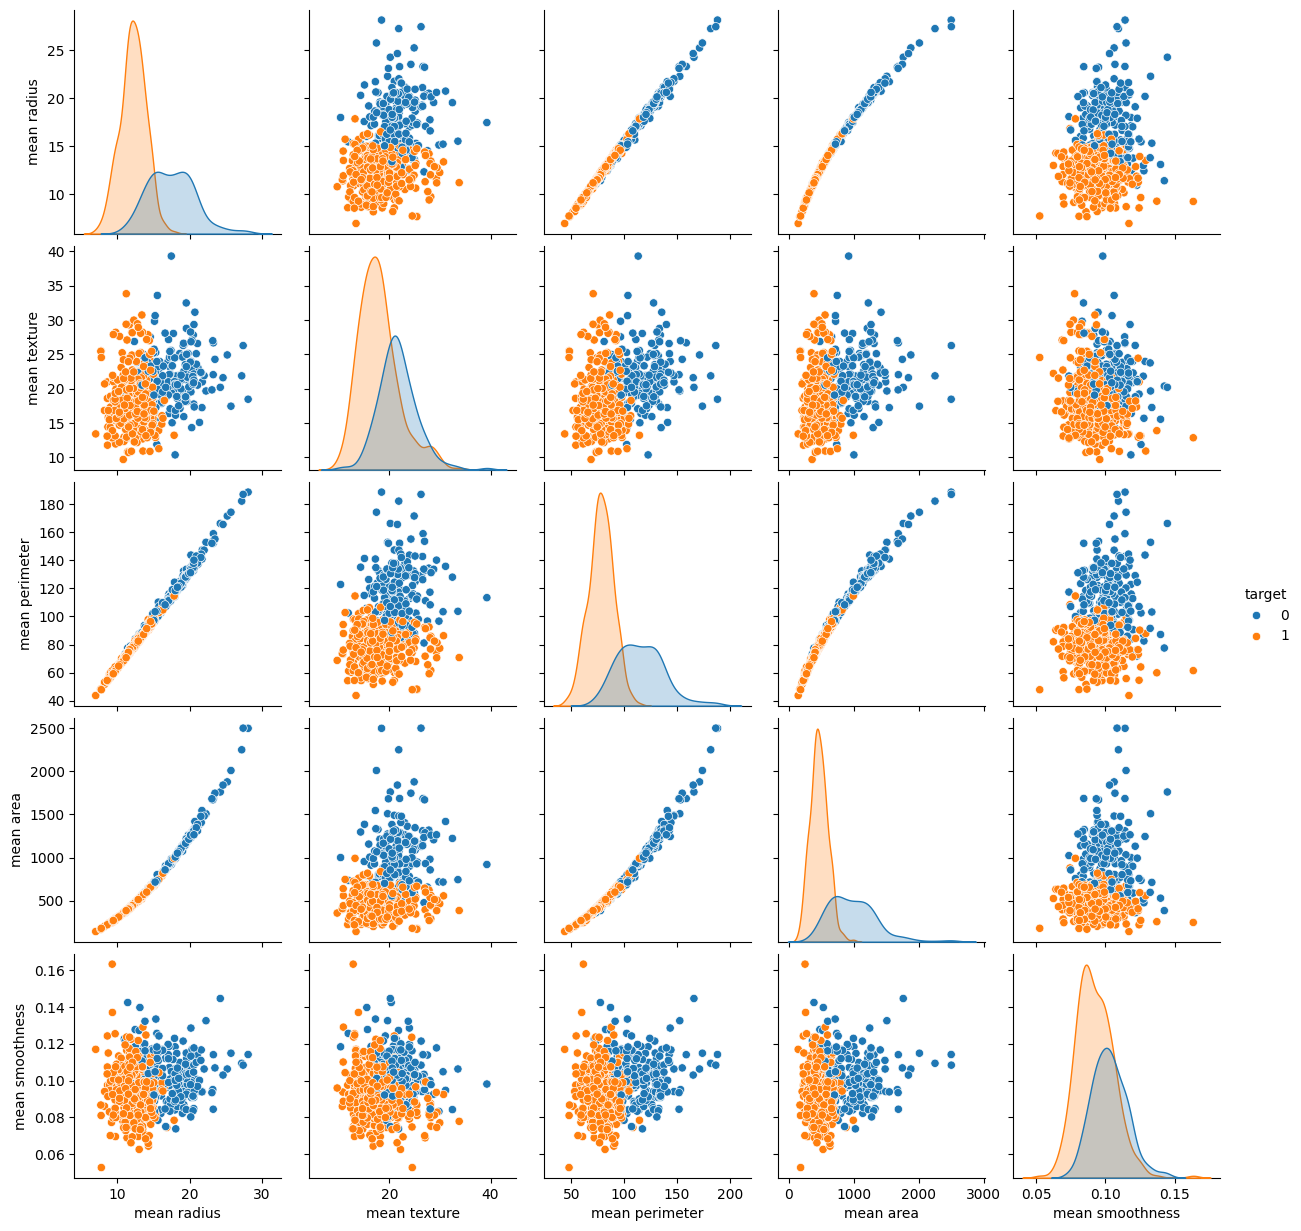

In [34]:
subset = df.iloc[:, :5].copy() # all rows, first 5 columns / .copy() will make a copy of the df to make sure that we don't make unwanted changes to the original df
subset['target'] = target # creating a new row in the dataframe to equal our target Series
sns.pairplot(subset, hue='target', diag_kind='kde') # hue makes sure target is a different color than the data / diag_kind('kde') will show underlying distribution curves 
plt.show() # shows the graph

### Step 7: Create a correlation coefficient heatmap

- annot=True: shows the coefficient in each square
- fmt=".2f": formats how many numbers of the coefficient should be shown
- cmap: sets the color palette for the heatmap —> blue for lower values, red for higher values, with white around the middle.
- square=True: makes each item a perfect square in the heatmap instead of a rectangle

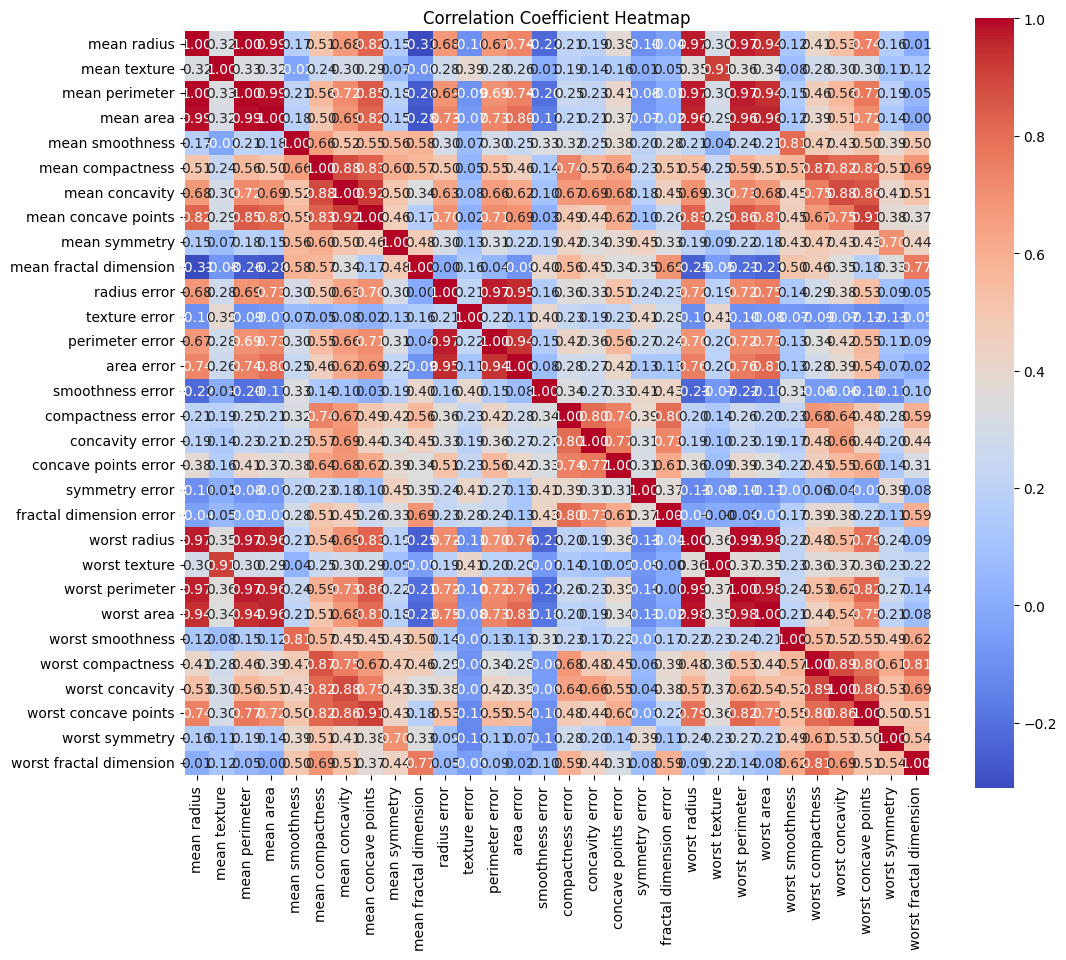

In [35]:
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Coefficient Heatmap")
plt.show()

### Step 8: Create a boxplot for mean radius by target type

- We use the mean radius because in breast cancer pathology, malignant tumors tend to have larger, more irregular nuclei, while benign ones have smaller, more uniform ones. So, the mean radius often shows one of the strongest statistical separations between the two classes.
- Mean radius is not not the only determinant, but it’s a highly correlated and easily interpretable feature among the dataset’s measurements.

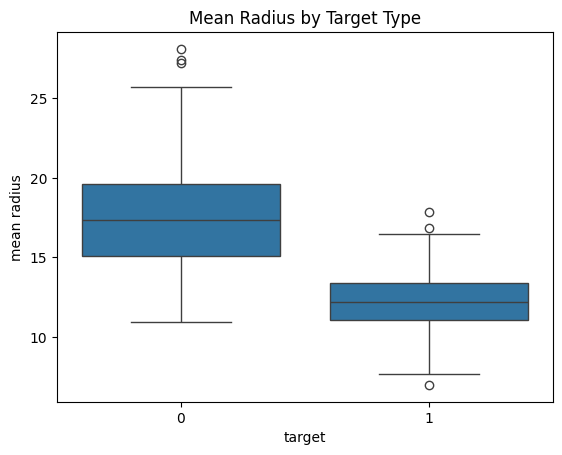

In [38]:
sns.boxplot(x='target', y='mean radius', data=subset)
plt.title("Mean Radius by Target Type")
plt.show()

### Step 9: Split the data into train / test sets

- train_test_split: Splits our data by generating random numbers that correlate to rows in our dataset based on the percentage of split data (test data | training data)
- test_size: Determines the size of the test_set. Here we use 0.2 because we want 20% of the overall data to be used for testing purposes.
- random_state: Assigns a seed_number (a number for a random number generator to use so that it can reproduce the same results that occurred during that seed assignment.) to make sure results are reprducible based on that random_state seed number.
- stratify: Ensures the proportion of each classification in both the training and testing sets is equal by taking in the target series and separating it based on its possibly classifications (in this case 0 or 1). Otherwise, the computer might not know if our test data contains mostly all of one class which would lead to unreliable evaluation.

In [40]:
X = df # X is the data
y = target # y is the target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Step 10: Build the logistic regression model

- We are making sure to keep the random_state the same as the train_test_split data we just created
- max_iter: ????
- classes_ : ndarray of shape (n_classes, ) A list of class labels known to the classifier.
- coef_ : ndarray of shape (1, n_features) or (n_classes, n_features) Coefficient of the features in the decision function. `coef_` is of shape (1, n_features) when the given problem is binary. In particular, when `multi_class='multinomial'`, `coef_` corresponds to outcome 1 (True) and `-coef_` corresponds to outcome 0 (False).
- max_iter : int, default=100: Maximum number of iterations taken for the solvers to converge.

In [67]:
model = LogisticRegression(max_iter=1000, random_state=12)
model.fit(X_train, y_train)

/Users/zinkii/Software Projects/ML Bootcamp/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,12
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### Step 11: Evaluate the model

- model.score: returns a number between 0 - 1 depending on how accurate the predictions of the model are?

In [44]:
print(model.score(X_test, y_test))

0.956140350877193


### Step 12: Generate a confusion matrix

- what the hell is model.classes_
- This confusion matrix tells us that...

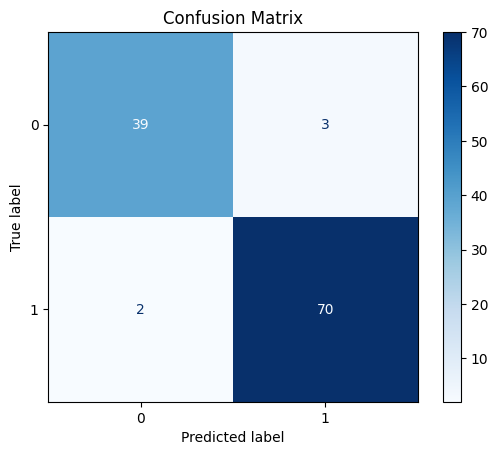

In [46]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### Step 13: Generate a classification report

In [47]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### Step 14: Extract coefficients

- Why do we extract coefficients?

In [49]:
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)

                    Feature  Coefficient
0               mean radius     1.609133
11            texture error     1.563930
20             worst radius     0.738678
15        compactness error     0.125754
16          concavity error     0.072940
1              mean texture     0.065839
19  fractal dimension error     0.026907
3                 mean area     0.007403
9    mean fractal dimension    -0.016688
23               worst area    -0.025031
14         smoothness error    -0.025722
22          worst perimeter    -0.028705
18           symmetry error    -0.035486
10             radius error    -0.038340
17     concave points error    -0.045886
13               area error    -0.068455
29  worst fractal dimension    -0.078745
2            mean perimeter    -0.141651
4           mean smoothness    -0.210932
5          mean compactness    -0.287802
21            worst texture    -0.318435
12          perimeter error    -0.358162
7       mean concave points    -0.379874
8             me

### Step 15: Normalize the coefficients by standard deviation

In [50]:
stds = X_train.std()

# Normalize coefficients
normalized_coefs = model.coef_[0] * stds

coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Normalized Coefficient': normalized_coefs
}).sort_values(by='Normalized Coefficient', ascending=False)

print(coef_df)

                                         Feature  Normalized Coefficient
mean radius                          mean radius                5.630967
worst radius                        worst radius                3.523506
mean area                              mean area                2.553791
texture error                      texture error                0.893821
mean texture                        mean texture                0.290042
concavity error                  concavity error                0.002361
compactness error              compactness error                0.002322
fractal dimension error  fractal dimension error                0.000075
smoothness error                smoothness error               -0.000081
mean fractal dimension    mean fractal dimension               -0.000119
concave points error        concave points error               -0.000289
symmetry error                    symmetry error               -0.000311
worst fractal dimension  worst fractal dimension   

### Step 16: Sort feature names and coefficients by absolute value of coefficients

In [51]:
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]
})

coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print(coef_df)

                    Feature  Coefficient  Abs_Coefficient
0               mean radius     1.609133         1.609133
11            texture error     1.563930         1.563930
26          worst concavity    -1.524889         1.524889
28           worst symmetry    -0.974681         0.974681
25        worst compactness    -0.894616         0.894616
27     worst concave points    -0.809191         0.809191
20             worst radius     0.738678         0.738678
6            mean concavity    -0.583998         0.583998
24         worst smoothness    -0.397603         0.397603
8             mean symmetry    -0.388866         0.388866
7       mean concave points    -0.379874         0.379874
12          perimeter error    -0.358162         0.358162
21            worst texture    -0.318435         0.318435
5          mean compactness    -0.287802         0.287802
4           mean smoothness    -0.210932         0.210932
2            mean perimeter    -0.141651         0.141651
15        comp

### Step 17: Visualize feature importance

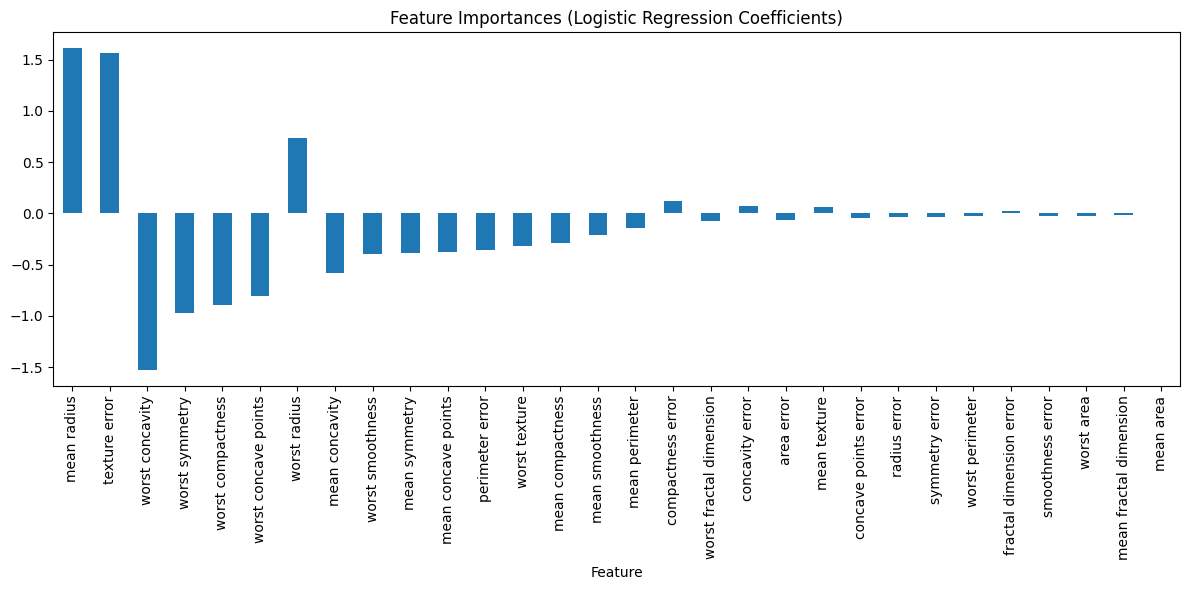

In [52]:
coef_df.plot(
    x='Feature',
    y='Coefficient',
    kind='bar',
    figsize=(12,6),
    title='Feature Importances (Logistic Regression Coefficients)',
    legend=False
)
plt.tight_layout()
plt.show()